In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


In [2]:
model = tf.keras.applications.MobileNetV2()
print(model)

In [3]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [5]:
INPUT_IMAGE_SIZE = model.get_input_shape_at(0)[1]
print('INPUT_IMAGE_SIZE:', INPUT_IMAGE_SIZE)

INPUT_IMAGE_SIZE: 224


In [6]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]

In [7]:
print('Labels shape:', labels.shape)

Labels shape: (1000,)


In [8]:
print(labels)

['tench' 'goldfish' 'great white shark' 'tiger shark' 'hammerhead'
 'electric ray' 'stingray' 'cock' 'hen' 'ostrich' 'brambling' 'goldfinch'
 'house finch' 'junco' 'indigo bunting' 'robin' 'bulbul' 'jay' 'magpie'
 'chickadee' 'water ouzel' 'kite' 'bald eagle' 'vulture' 'great grey owl'
 'European fire salamander' 'common newt' 'eft' 'spotted salamander'
 'axolotl' 'bullfrog' 'tree frog' 'tailed frog' 'loggerhead'
 'leatherback turtle' 'mud turtle' 'terrapin' 'box turtle' 'banded gecko'
 'common iguana' 'American chameleon' 'whiptail' 'agama' 'frilled lizard'
 'alligator lizard' 'Gila monster' 'green lizard' 'African chameleon'
 'Komodo dragon' 'African crocodile' 'American alligator' 'triceratops'
 'thunder snake' 'ringneck snake' 'hognose snake' 'green snake'
 'king snake' 'garter snake' 'water snake' 'vine snake' 'night snake'
 'boa constrictor' 'rock python' 'Indian cobra' 'green mamba' 'sea snake'
 'horned viper' 'diamondback' 'sidewinder' 'trilobite' 'harvestman'
 'scorpion' 'blac

In [9]:
def load_image(image_path):
    return tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
    )

In [10]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [11]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [12]:
TEST_IMAGES_DIR_PATH = pathlib.Path('data')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS

[PosixPath('data/banana.jpg'),
 PosixPath('data/city.jpg'),
 PosixPath('data/dogs.jpg'),
 PosixPath('data/ship.jpg'),
 PosixPath('data/street.jpg')]

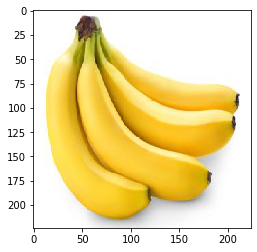

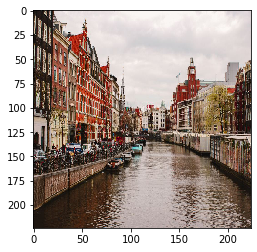

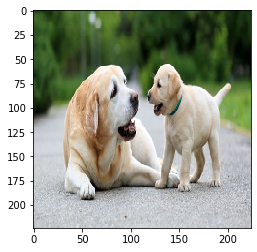

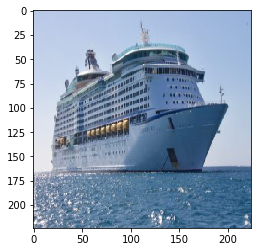

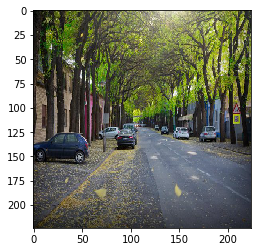

In [13]:
test_images = []
for image_path in TEST_IMAGE_PATHS:
    # <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
    test_image = load_image(image_path)
    test_image_array = image_to_array(test_image)
    test_images.append(test_image_array)
    display_image(test_image_array)

In [14]:
print(test_images[1])

[[[ 35  26  21]
  [ 36  26  24]
  [ 31  23  20]
  ...
  [228 219 222]
  [228 219 222]
  [227 218 221]]

 [[ 31  23  21]
  [ 33  25  23]
  [ 28  25  20]
  ...
  [223 214 217]
  [219 210 213]
  [219 210 213]]

 [[ 36  26  25]
  [ 30  25  22]
  [ 26  25  20]
  ...
  [219 210 213]
  [216 207 210]
  [217 208 211]]

 ...

 [[ 31  24  18]
  [ 29  22  16]
  [ 29  22  16]
  ...
  [ 73  54  37]
  [116 100  85]
  [ 55  41  28]]

 [[ 29  22  16]
  [ 28  21  15]
  [ 29  22  16]
  ...
  [ 64  48  32]
  [ 43  31  17]
  [ 42  32  20]]

 [[ 31  24  18]
  [ 29  22  16]
  [ 29  22  16]
  ...
  [ 51  41  31]
  [ 55  42  33]
  [ 55  43  31]]]


In [15]:
def image_preprocess(image_array):
    return tf.keras.applications.mobilenet_v2.preprocess_input(
        image_array[tf.newaxis, ...]
    )

In [16]:
test_images_preprocessed = []
for test_image in test_images:
    test_image_preprocessed = image_preprocess(test_image)
    test_images_preprocessed.append(test_image_preprocessed)

In [17]:
print('Image shape before preprocessing:', test_images[0].shape)
print('Image shape after preprocessing:', test_images_preprocessed[0].shape)

Image shape before preprocessing: (224, 224, 3)
Image shape after preprocessing: (1, 224, 224, 3)


In [18]:
print(test_images_preprocessed[1])

[[[[-0.7254902  -0.79607844 -0.8352941 ]
   [-0.7176471  -0.79607844 -0.8117647 ]
   [-0.75686276 -0.81960785 -0.84313726]
   ...
   [ 0.7882353   0.7176471   0.7411765 ]
   [ 0.7882353   0.7176471   0.7411765 ]
   [ 0.78039217  0.70980394  0.73333335]]

  [[-0.75686276 -0.81960785 -0.8352941 ]
   [-0.7411765  -0.8039216  -0.81960785]
   [-0.78039217 -0.8039216  -0.84313726]
   ...
   [ 0.7490196   0.6784314   0.7019608 ]
   [ 0.7176471   0.64705884  0.67058825]
   [ 0.7176471   0.64705884  0.67058825]]

  [[-0.7176471  -0.79607844 -0.8039216 ]
   [-0.7647059  -0.8039216  -0.827451  ]
   [-0.79607844 -0.8039216  -0.84313726]
   ...
   [ 0.7176471   0.64705884  0.67058825]
   [ 0.69411767  0.62352943  0.64705884]
   [ 0.7019608   0.6313726   0.654902  ]]

  ...

  [[-0.75686276 -0.8117647  -0.85882354]
   [-0.77254903 -0.827451   -0.8745098 ]
   [-0.77254903 -0.827451   -0.8745098 ]
   ...
   [-0.42745095 -0.5764706  -0.70980394]
   [-0.09019607 -0.21568626 -0.3333333 ]
   [-0.5686275  

In [65]:
def get_tags(probs, labels, max_classes = 5, prob_threshold = 0.01):
    probs_mask = probs > prob_threshold
    probs_filtered = probs[probs_mask] * 100
    labels_filtered = labels[probs_mask]
    
    sorted_index = np.flip(np.argsort(probs_filtered))
    labels_filtered = labels_filtered[sorted_index][:max_classes]
    probs_filtered = probs_filtered[sorted_index][:max_classes].astype(np.int)
    
    tags = ''
    for i in range(0, len(labels_filtered)):
        tags = tags + labels_filtered[i] + ' (' + str(probs_filtered[i]) + '%), ' 

    return tags, labels_filtered, probs_filtered 

In [19]:
TEST_IMAGE_INDEX = 1

In [20]:
result = model(test_images_preprocessed[TEST_IMAGE_INDEX])

In [21]:
result.shape

TensorShape([1, 1000])

In [22]:
print(result)

tf.Tensor(
[[1.67357328e-04 7.48886960e-05 9.10225790e-05 1.61429649e-04
  1.80477553e-04 2.01649018e-05 2.37957895e-04 1.66809506e-04
  1.43144003e-04 1.60500538e-04 1.40027434e-04 7.66541052e-05
  2.55448394e-04 1.01829886e-04 6.68075882e-05 6.71937887e-05
  1.74754183e-04 4.76423484e-05 1.60923169e-04 2.91181699e-04
  5.66527633e-05 5.96032805e-05 4.86944009e-05 2.32021936e-04
  6.23657179e-05 1.27928943e-04 1.92076041e-04 6.28614274e-04
  1.78236514e-04 1.19395932e-04 9.80493860e-05 3.75609598e-05
  3.84934683e-04 1.28144806e-04 1.17247058e-04 1.13339731e-04
  1.55172413e-04 4.41422366e-04 4.54554429e-05 1.81667769e-04
  6.85919586e-05 2.61485839e-04 1.82488497e-04 7.38181407e-05
  3.72787035e-04 2.17093329e-04 7.59527611e-05 6.37365811e-05
  7.39252137e-05 5.10215614e-05 2.00286537e-04 3.32779928e-05
  3.73418967e-04 1.86561752e-04 3.07171467e-05 5.00616334e-05
  7.99422851e-05 2.87409755e-04 1.48447871e-04 3.89670386e-05
  1.82260028e-05 1.02116865e-04 2.26840348e-05 1.01948033e-

In [23]:
np_result = result.numpy()[0]

In [24]:
print(np_result)

[1.67357328e-04 7.48886960e-05 9.10225790e-05 1.61429649e-04
 1.80477553e-04 2.01649018e-05 2.37957895e-04 1.66809506e-04
 1.43144003e-04 1.60500538e-04 1.40027434e-04 7.66541052e-05
 2.55448394e-04 1.01829886e-04 6.68075882e-05 6.71937887e-05
 1.74754183e-04 4.76423484e-05 1.60923169e-04 2.91181699e-04
 5.66527633e-05 5.96032805e-05 4.86944009e-05 2.32021936e-04
 6.23657179e-05 1.27928943e-04 1.92076041e-04 6.28614274e-04
 1.78236514e-04 1.19395932e-04 9.80493860e-05 3.75609598e-05
 3.84934683e-04 1.28144806e-04 1.17247058e-04 1.13339731e-04
 1.55172413e-04 4.41422366e-04 4.54554429e-05 1.81667769e-04
 6.85919586e-05 2.61485839e-04 1.82488497e-04 7.38181407e-05
 3.72787035e-04 2.17093329e-04 7.59527611e-05 6.37365811e-05
 7.39252137e-05 5.10215614e-05 2.00286537e-04 3.32779928e-05
 3.73418967e-04 1.86561752e-04 3.07171467e-05 5.00616334e-05
 7.99422851e-05 2.87409755e-04 1.48447871e-04 3.89670386e-05
 1.82260028e-05 1.02116865e-04 2.26840348e-05 1.01948033e-04
 5.41410955e-05 6.083782

In [64]:
tags, labels_filtered, probs_filtered = get_tags(np_result, labels)

print('probs_filtered:', probs_filtered)
print('labels_filtered:', labels_filtered)
print('tags:', tags)

probs_filtered: [39 10  9  4  1]
labels_filtered: ['dock' 'pier' 'suspension bridge' 'palace' 'paddlewheel']
tags: dock (39%), pier (10%), suspension bridge (9%), palace (4%), paddlewheel (1%), 


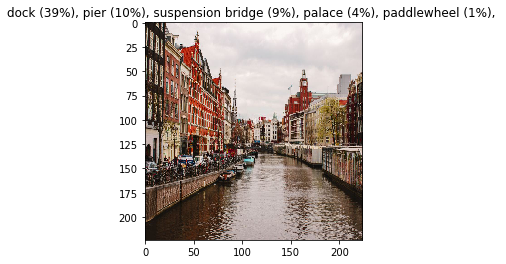

In [66]:
plt.figure()
plt.title(tags)
plt.imshow(test_images[TEST_IMAGE_INDEX]);

plt.show()

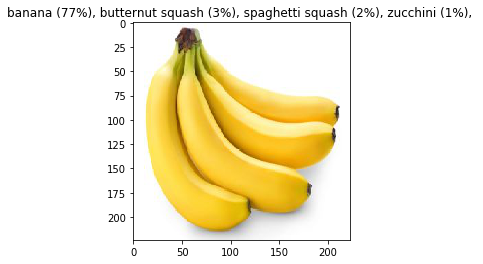

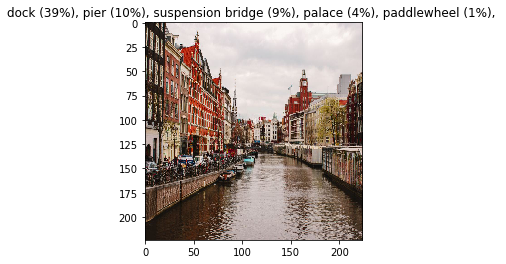

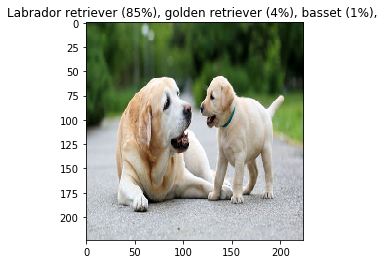

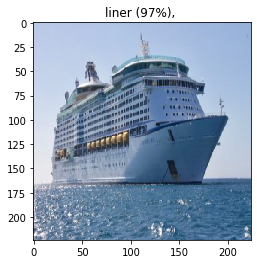

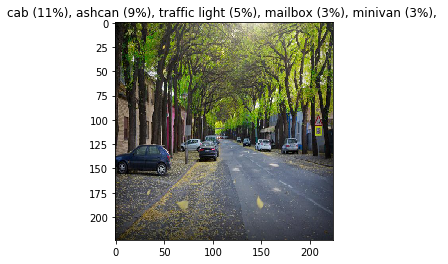

In [80]:
for image_index in range(0, len(test_images)):
    test_image = test_images[image_index]
    test_image_preprocessed = test_images_preprocessed[image_index]
    probabilities = model(test_image_preprocessed)
    tags, labels_filtered, probs_filtered = get_tags(probabilities.numpy()[0], labels)
    plt.figure()
    plt.title(tags)
    plt.imshow(test_image);

plt.show()

In [26]:
model_name = 'image_classification_mobilenet_v2.h5'
model.save(model_name, save_format='h5')